<a href="https://colab.research.google.com/github/JSEFERINO/CURSO2024/blob/main/03_Probabilidad_Eventos3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Curso Teoría de Probabilidad por Julio Hurtado Márquez**
## **Parte XI- Variables Aleatorias y sus Distribuciones**
# **150. Experimentos Aleatorios y Deterministas - Conceptos**

In [ ]:
# **a. Nuestras librerias a usar**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

print("Setup Complete")

Setup Complete


## **a. Experimentos Aleatorios vs Deterministas**
+ **Existen dos tipos de fenómenos o experimentos en la naturaleza: los deterministas y los aleatorios.**

+ **Experimento Aleatorio**: es aquel en el que se conocen todos los resultados posibles pero sin tener la certeza de cuál será un resultado particular.
+ **Experimento Determinístico**: es aquel en el que se tiene la certeza de cuál será el resultado
+ + **Ejemplos**
+ + **E.A Determinista**. Dejar caer un objeto desde cierta altura y observar (medir) el tiempo que tarda en llegar al suelo.
+ + **E.A Determinista**. Observar (medir) la presión de un gas a temperatura constante cuando su volumen disminuye.
+ + **E.A Aleatorio**. Lanzar un dado y observar la cara superior al caer.
+ + **E.A Aleatorio**. Dejar una molécula de oxígeno en libre movimiento en un contenedor durante cierto tiempo y registrar su posición.

+  **Video 1. Espacio muestral1**
+ + https://www.youtube.com/watch?v=huSkDf3UOCc/



## **Ejemplo 1. Simulando el Lanzamiento de un Dado**

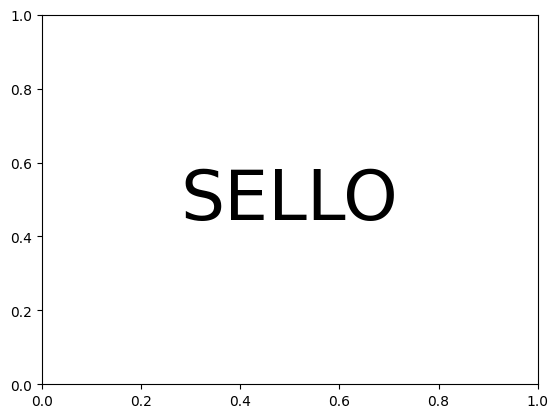

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np

# Función para lanzar la moneda
def lanzar_moneda():
    return np.random.choice(['CARA', 'SELLO'])

# Función para actualizar el gráfico en cada fotograma de la animación
def actualizar(i):
    resultado = lanzar_moneda()
    ejes.clear()
    ejes.text(0.5, 0.5, resultado, fontsize=50, ha='center', va='center')

# Configuración inicial del gráfico
fig, ejes = plt.subplots()

# Configuración de la animación
ani = animation.FuncAnimation(fig, actualizar, frames=19, interval=500, repeat=False)

# Muestra la animación en el notebook
HTML(ani.to_html5_video())


## **Ejemplo 2. Simulando el Lanzamiento de un Dado y graficando el resultado**

{'CARA': 0, 'SELLO': 0}


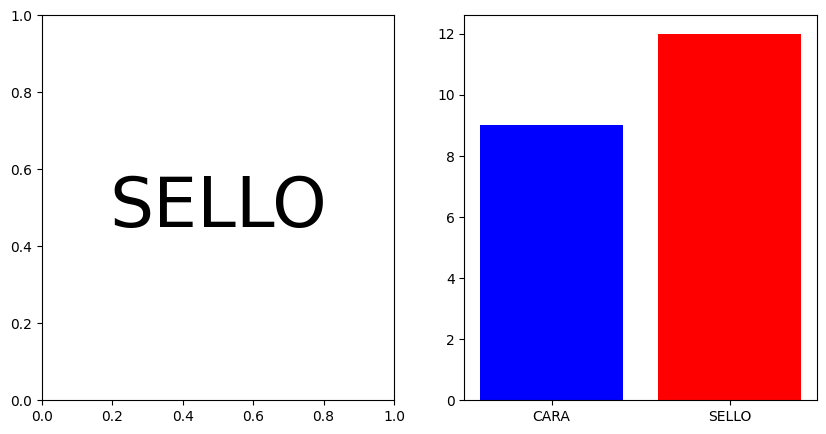

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np

# Función para lanzar la moneda
def lanzar_moneda():
    return np.random.choice(['CARA', 'SELLO'])

# Inicialización de variables para contar los resultados
resultados = {'CARA': 0, 'SELLO': 0}

# Función para actualizar los resultados y el gráfico en cada fotograma de la animación
def actualizar(i):
    resultado = lanzar_moneda()
    resultados[resultado] += 1
    ejes[0].clear()
    ejes[0].text(0.5, 0.5, resultado, fontsize=50, ha='center', va='center')
    ejes[1].clear()
    ejes[1].bar(resultados.keys(), resultados.values(), color=['blue', 'red'])

# Configuración inicial del gráfico
fig, ejes = plt.subplots(1, 2, figsize=(10, 5))

# Configuración de la animación
ani = animation.FuncAnimation(fig, actualizar, frames=19, interval=500, repeat=False)
print(resultados)
# Muestra la animación en el notebook
HTML(ani.to_html5_video())


## **Ejemplo 2. Simulando el Lanzamiento de un Dado y graficando el resultado y anotando los resultados obtenidos**

   Resultado
0       CARA
1      SELLO
2      SELLO
3      SELLO
4      SELLO
5      SELLO
6      SELLO
7      SELLO
8       CARA
9       CARA
10      CARA
11      CARA
12     SELLO
13      CARA
14     SELLO
15      CARA
16      CARA
17     SELLO
18     SELLO
19      CARA


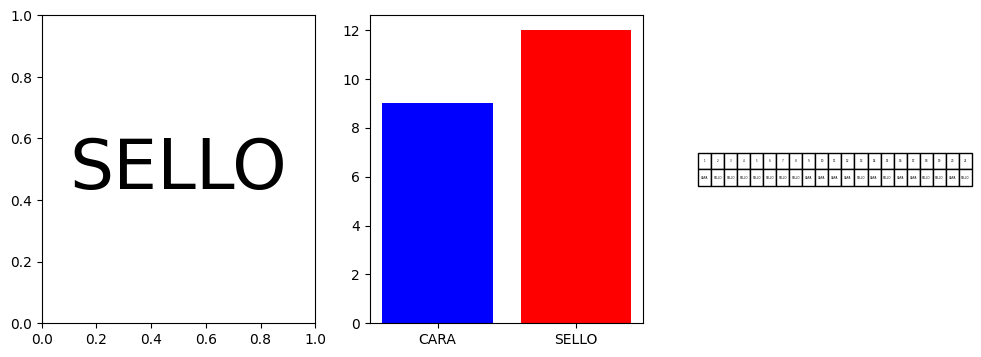

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np

# Función para lanzar la moneda
def lanzar_moneda():
    return np.random.choice(['CARA', 'SELLO'])

# Inicialización de variables para contar los resultados
resultados = {'CARA': 0, 'SELLO': 0}
historial_resultados = []

# Función para actualizar los resultados, la tabla y el gráfico en cada fotograma de la animación
def actualizar(i):
    resultado = lanzar_moneda()
    resultados[resultado] += 1
    historial_resultados.append(resultado)

    ejes[0].clear()
    ejes[0].text(0.5, 0.5, resultado, fontsize=50, ha='center', va='center')

    ejes[1].clear()
    ejes[1].bar(resultados.keys(), resultados.values(), color=['blue', 'red'])

    ejes[2].clear()
    ejes[2].axis('off')
    tabla = ejes[2].table(cellText=[historial_resultados], colLabels=list(range(1, len(historial_resultados)+1)), cellLoc='center', loc='center')
    tabla.auto_set_font_size()
    tabla.set_fontsize(10)

# Configuración inicial del gráfico
fig, ejes = plt.subplots(1, 3, figsize=(12, 4))

# Configuración de la animación
ani = animation.FuncAnimation(fig, actualizar, frames=19, interval=500, repeat=False)

# Muestra la animación en el notebook
HTML(ani.to_html5_video())

import pandas as pd


# Crear un DataFrame
df = pd.DataFrame(historial_resultados, columns=['Resultado'])

# Mostrar el DataFrame
print(df)


## **Ejemplo 3. Simulando el Lanzamiento de dos monedas y graficando el resultado y anotando los resultados obtenidos**

   Resultado
0        S-S
1        S-S
2        C-C
3        S-S
4        C-S
5        C-C
6        C-S
7        C-S
8        C-S
9        S-S
10       S-C
11       C-C
12       S-C
13       S-S
14       C-C
15       C-S
16       C-C
17       C-S
18       C-C
19       S-S


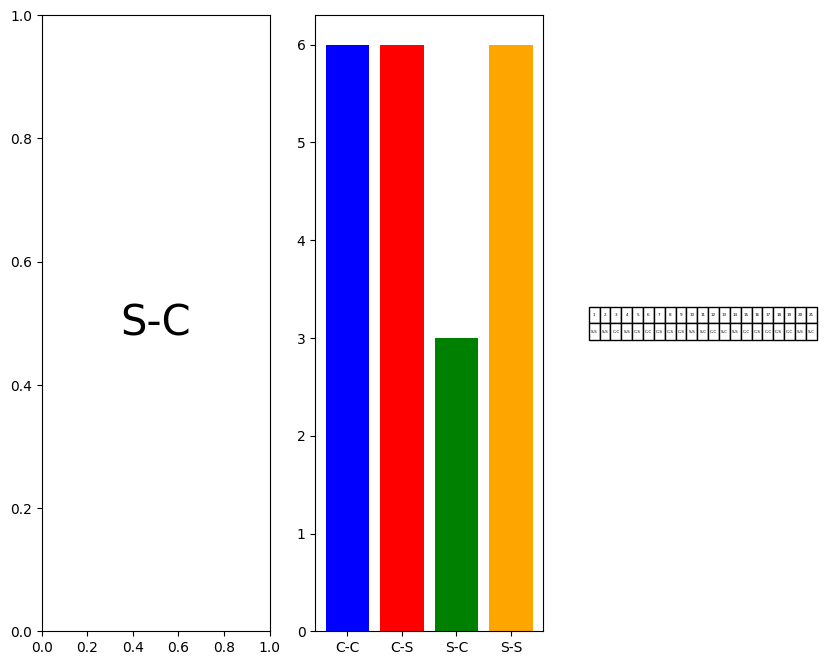

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np

# Función para lanzar las monedas
def lanzar_monedas():
    return np.random.choice(['C', 'S'], size=2)

# Inicialización de variables para contar los resultados
resultados = {'C-C': 0, 'C-S': 0, 'S-C': 0, 'S-S': 0}
historial_resultados = []

# Función para actualizar los resultados, la tabla y el gráfico en cada fotograma de la animación
def actualizar(i):
    resultados_lanzamiento = '-'.join(lanzar_monedas())
    resultados[resultados_lanzamiento] += 1
    historial_resultados.append(resultados_lanzamiento)

    ejes[0].clear()
    ejes[0].text(0.5, 0.5, resultados_lanzamiento, fontsize=30, ha='center', va='center')

    ejes[1].clear()
    ejes[1].bar(resultados.keys(), resultados.values(), color=['blue', 'red', 'green', 'orange'])

    ejes[2].clear()
    ejes[2].axis('off')
    tabla = ejes[2].table(cellText=[historial_resultados], colLabels=list(range(1, len(historial_resultados)+1)), cellLoc='center', loc='center')
    tabla.auto_set_font_size()
    tabla.set_fontsize(8)

# Configuración inicial del gráfico
fig, ejes = plt.subplots(1, 3, figsize=(10, 8))

# Configuración de la animación
ani = animation.FuncAnimation(fig, actualizar, frames=19, interval=1500, repeat=False)

# Muestra la animación en el notebook
HTML(ani.to_html5_video())
import pandas as pd


# Crear un DataFrame
df = pd.DataFrame(historial_resultados, columns=['Resultado'])

# Mostrar el DataFrame
print(df)

## **Ejemplo 4: Simular el lanzamiento de un dado varias veces - Usando Python**
+ Para generar números aleatorios en Python se hace uso del módulo *random* de la biblioteca estándar. Este módulo ofrece una serie de funciones que generan números aleatorios de manera diferente.
- **randint(a, b)**. Genera números aleatorios en Python de valor entero.

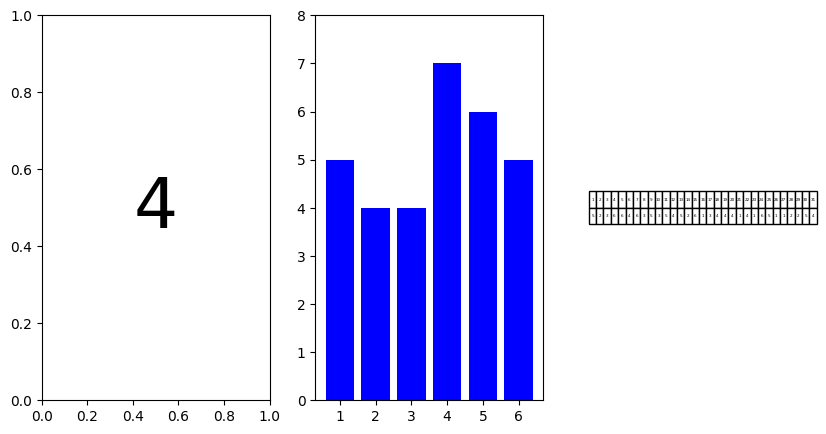

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np

# Función para lanzar el dado
def lanzar_dado():
    return np.random.randint(1, 7)

# Inicialización de variables para contar los resultados
resultados = {str(i): 0 for i in range(1, 7)}
historial_resultados = []

# Función para actualizar los resultados, la tabla y el gráfico en cada fotograma de la animación
def actualizar(i):
    resultado = lanzar_dado()
    resultados[str(resultado)] += 1
    historial_resultados.append(resultado)

    ejes[0].clear()
    ejes[0].text(0.5, 0.5, str(resultado), fontsize=50, ha='center', va='center')

    ejes[1].clear()
    ejes[1].bar(resultados.keys(), resultados.values(), color='blue')
    ejes[1].set_ylim(0, max(resultados.values()) + 1)

    ejes[2].clear()
    ejes[2].axis('off')
    tabla = ejes[2].table(cellText=[historial_resultados], colLabels=list(range(1, len(historial_resultados)+1)), cellLoc='center', loc='center')
    tabla.auto_set_font_size()
    tabla.set_fontsize(10)

# Configuración inicial del gráfico
fig, ejes = plt.subplots(1, 3, figsize=(10, 5))

# Configuración de la animación
ani = animation.FuncAnimation(fig, actualizar, frames=29, interval=500, repeat=False)

# Muestra la animación en el notebook
HTML(ani.to_html5_video())


##**Ejemplo 5. Lanzamiento de dos dados**

<ipython-input-10-5139fff62036>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ejes[1].set_xticklabels(x_labels, rotation=45, ha='right')


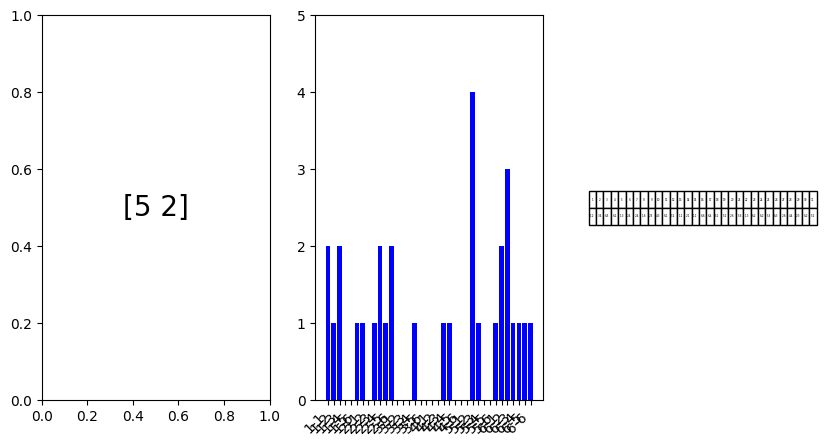

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np

# Función para lanzar dos dados
def lanzar_dos_dados():
    return np.random.randint(1, 7, size=2)

# Inicialización de variables para contar los resultados
resultados = {(i, j): 0 for i in range(1, 7) for j in range(1, 7)}
historial_resultados = []

# Función para actualizar los resultados, la tabla y el gráfico en cada fotograma de la animación
def actualizar(i):
    resultado = lanzar_dos_dados()
    resultados[tuple(resultado)] += 1
    historial_resultados.append(resultado)

    ejes[0].clear()
    ejes[0].text(0.5, 0.5, str(resultado), fontsize=20, ha='center', va='center')

    ejes[1].clear()
    x_labels = [f"{i}-{j}" for i in range(1, 7) for j in range(1, 7)]
    ejes[1].bar(x_labels, [resultados[(i, j)] for i in range(1, 7) for j in range(1, 7)], color='blue')
    ejes[1].set_xticklabels(x_labels, rotation=45, ha='right')
    ejes[1].set_ylim(0, max(resultados.values()) + 1)

    ejes[2].clear()
    ejes[2].axis('off')
    tabla = ejes[2].table(cellText=[['-'.join(map(str, res)) for res in historial_resultados]], colLabels=list(range(1, len(historial_resultados)+1)), cellLoc='center', loc='center')
    tabla.auto_set_font_size()
    tabla.set_fontsize(10)

# Configuración inicial del gráfico
fig, ejes = plt.subplots(1, 3, figsize=(10, 5))

# Configuración de la animación
ani = animation.FuncAnimation(fig, actualizar, frames=29, interval=500, repeat=False)

# Muestra la animación en el notebook
HTML(ani.to_html5_video())



## **Ejemplo 6. Lanzamiento de dos dados y obtener el total**

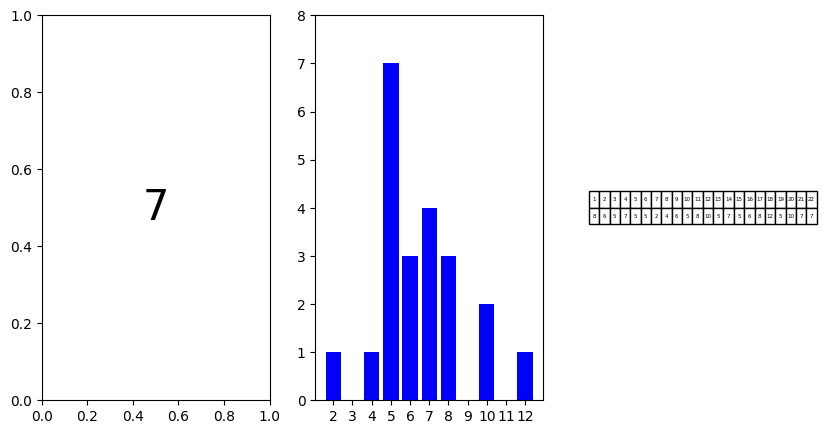

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np

# Función para lanzar dos dados y obtener el total
def lanzar_dados_y_obtener_total():
    return np.random.randint(1, 7, size=2).sum()

# Inicialización de variables para contar los resultados
resultados = {i: 0 for i in range(2, 13)}
historial_resultados = []

# Función para actualizar los resultados, la tabla y el gráfico en cada fotograma de la animación
def actualizar(i):
    total = lanzar_dados_y_obtener_total()
    resultados[total] += 1
    historial_resultados.append(total)

    ejes[0].clear()
    ejes[0].text(0.5, 0.5, str(total), fontsize=30, ha='center', va='center')

    ejes[1].clear()
    x_labels = list(range(2, 13))
    ejes[1].bar(x_labels, [resultados[i] for i in x_labels], color='blue')
    ejes[1].set_xticks(x_labels)
    ejes[1].set_ylim(0, max(resultados.values()) + 1)

    ejes[2].clear()
    ejes[2].axis('off')
    tabla = ejes[2].table(cellText=[historial_resultados], colLabels=list(range(1, len(historial_resultados)+1)), cellLoc='center', loc='center')
    tabla.auto_set_font_size()
    tabla.set_fontsize(10)

# Configuración inicial del gráfico
fig, ejes = plt.subplots(1, 3, figsize=(10, 5))

# Configuración de la animación
ani = animation.FuncAnimation(fig, actualizar, frames=20, interval=500, repeat=False)

# Muestra la animación en el notebook
HTML(ani.to_html5_video())


## **Ejemplo 7. Lanzamiento de una moneda y un dado**

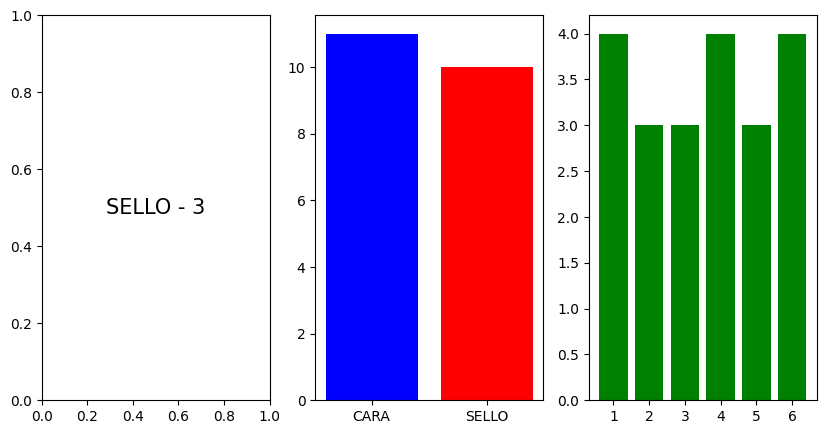

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np

# Función para lanzar una moneda
def lanzar_moneda():
    return np.random.choice(['CARA', 'SELLO'])

# Función para lanzar un dado
def lanzar_dado():
    return np.random.randint(1, 7)

# Inicialización de variables para contar los resultados
resultados_moneda = {'CARA': 0, 'SELLO': 0}
resultados_dado = {i: 0 for i in range(1, 7)}
historial_resultados = []

# Función para actualizar los resultados, la tabla y el gráfico en cada fotograma de la animación
def actualizar(i):
    resultado_moneda = lanzar_moneda()
    resultado_dado = lanzar_dado()
    resultados_moneda[resultado_moneda] += 1
    resultados_dado[resultado_dado] += 1
    historial_resultados.append((resultado_moneda, resultado_dado))

    ejes[0].clear()
    ejes[0].text(0.5, 0.5, f"{resultado_moneda} - {resultado_dado}", fontsize=15, ha='center', va='center')

    ejes[1].clear()
    ejes[1].bar(resultados_moneda.keys(), resultados_moneda.values(), color=['blue', 'red'])

    ejes[2].clear()
    ejes[2].bar(resultados_dado.keys(), resultados_dado.values(), color='green')
    ejes[2].set_xticks(list(resultados_dado.keys()))

# Configuración inicial del gráfico
fig, ejes = plt.subplots(1, 3, figsize=(10, 5))

# Configuración de la animación
ani = animation.FuncAnimation(fig, actualizar, frames=19, interval=500, repeat=False)

# Muestra la animación en el notebook
HTML(ani.to_html5_video())
